<h4>Contexto comercial <h4>
<h5>El motivo es entender cómo afectan diferentes factores como la edad, el género y el tipo de viaje en la satisfacción de los pasajeros en una compañía de aviación. Nuestra audiencia sería la compañía de aviación y sus empleados, ya que esta información les ayudaría a mejorar la experiencia de los pasajeros y, por lo tanto, aumentar su satisfacción y lealtad.<h5>


<h3>Limitaciones<h3>
<h5>Actualmente, tengo limitada accesibilidad a la información debido a que gran parte de los recursos y herramientas se encuentran alojados en sitios web de pago, lo que hace que no me resulte rentable acceder a la información más actualizada y relevante para mi investigación.<h5>

 <h4>   Problema comercial: Queremos saber el nivel de satisfaccion de pasajeros de líneas aéreas <h4>

<h5>1. ¿Cómo afecta la edad de los pasajeros a su satisfacción en un vuelo?<h5>
<h5>2. ¿Existe una diferencia en la satisfacción entre los pasajeros hombres y mujeres?<h5>
 <h5>3. ¿Hay una relación entre el tipo de viaje (por ejemplo, vacaciones, negocios) y la satisfacción del pasajero?<h5>
       
  <h5>Análisis Exploratorio de Datos (EDA)<h5>
      
 <h5>Utilizaremos visualizaciones como gráficos de caja, torta y de dispersión para explorar la relación entre las variables de edad, género y tipo de viaje con la satisfacción del pasajero.<h5>
 

<h6>Satisfacción de pasajeros de aerolíneas<h6>

<h6>Acerca del conjunto de datos<h6>
<h6>Contexto<h6>

<h6>Este conjunto de datos contiene una encuesta de satisfacción de pasajeros de líneas aéreas. ¿Qué factores están altamente correlacionados con un pasajero satisfecho (o insatisfecho)? ¿Puede predecir la satisfacción de los pasajeros?<h6>

#Content
#Gender: Gender of the passengers (Female, Male)

#Customer Type: The customer type (Loyal customer, disloyal customer)

#Age: The actual age of the passengers

#Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

#Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

#Flight distance: The flight distance of this journey

#Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

#Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

#Ease of Online booking: Satisfaction level of online booking

#Gate location: Satisfaction level of Gate location

#Food and drink: Satisfaction level of Food and drink

#Online boarding: Satisfaction level of online boarding

#Seat comfort: Satisfaction level of Seat comfort

#Inflight entertainment: Satisfaction level of inflight entertainment

#On-board service: Satisfaction level of On-board service

#Leg room service: Satisfaction level of Leg room service

#Baggage handling: Satisfaction level of baggage handling

#Check-in service: Satisfaction level of Check-in service

#Inflight service: Satisfaction level of inflight service

#Cleanliness: Satisfaction level of Cleanliness

#Departure Delay in Minutes: Minutes delayed when departure

#Arrival Delay in Minutes: Minutes delayed when Arrival

#Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [39]:
import seaborn as sns
import numpy as np
import pandas as pd
from   scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
import os

In [40]:
# cargamos los datos en un DataFrame

file_data = 'train.csv'
train_df = pd.read_csv(file_data,sep=',')

file_data = 'test.csv'
test_df = pd.read_csv(file_data,sep=',')


In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer_Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type_of_Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight_Distance                    25976 non-null  int64  
 8   Inflight_wifi_service              25976 non-null  int64  
 9   Departure_Arrival_time_convenient  25976 non-null  int64  
 10  Ease_of_Online_booking             25976 non-null  int64  
 11  Gate_location                      25976 non-null  int

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [43]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<h4>Modelo de regresión (Volstat)<h4>

In [44]:
train_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [45]:
model1 = 'id~Age'
lm1   = sm.ols(formula = model1, data = test_df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                     id   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.708
Date:                Mon, 17 Jul 2023   Prob (F-statistic):             0.0998
Time:                        17:04:37   Log-Likelihood:            -3.1052e+05
No. Observations:               25976   AIC:                         6.210e+05
Df Residuals:                   25974   BIC:                         6.211e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     6.4e+04    653.929     97.871      0.0

El primer modelo es una regresión lineal simple de la columna "id" contra la columna "Edad". El valor R-cuadrado es 0,000, lo que indica que el modelo no explica ninguna de las variaciones en la variable objetivo. El valor P para la estadística t del coeficiente "Edad" es 0,100, que no es significativo al nivel del 5 %, lo que significa que la relación entre "id" y "Edad" no es estadísticamente significativa.

In [46]:
model2 = 'id~Age + Checkin_service  '
lm2    = sm.ols(formula = model2, data = test_df).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                     id   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     83.53
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           6.92e-37
Time:                        17:04:37   Log-Likelihood:            -3.1043e+05
No. Observations:               25976   AIC:                         6.209e+05
Df Residuals:                   25973   BIC:                         6.209e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.641e+04    880.658     

El segundo modelo es una regresión lineal múltiple de "id" contra "Edad" y "Checkin_service". El valor de R-cuadrado aumentó a 0,006, lo que significa que el modelo explica un poco más de la variabilidad en la variable objetivo. El valor P para la estadística t del coeficiente "Checkin_service" es 0,000, que es significativo al nivel del 5 %, lo que significa que la relación entre "id" y "Checkin_service" es estadísticamente significativa.

In [47]:
model3 = 'Checkin_service~Age + Flight_Distance + Arrival_Delay_in_Minutes  '
lm3    = sm.ols(formula = model3, data = test_df).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:        Checkin_service   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     58.48
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.13e-37
Time:                        17:04:37   Log-Likelihood:                -42824.
No. Observations:               25893   AIC:                         8.566e+04
Df Residuals:                   25889   BIC:                         8.569e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

El tercer modelo es una regresión lineal múltiple de "Checkin_service" contra "Edad", "Flight_Distance" y "Arrival_Delay_in_Minutes". El valor R-cuadrado es 0,007, lo que significa que el modelo explica una pequeña cantidad de la variabilidad en la variable objetivo. Los valores P para las estadísticas t de los coeficientes "Age", "Flight_Distance" y "Arrival_Delay_in_Minutes" no se especifican, pero podemos suponer que no son significativos en función del valor bajo de R cuadrado.

In [48]:
model4 = 'Checkin_service~Age + Gender + Class + satisfaction + Type_of_Travel + Flight_Distance + Arrival_Delay_in_Minutes   '
lm4    = sm.ols(formula = model3, data = test_df).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:        Checkin_service   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     58.48
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.13e-37
Time:                        17:04:38   Log-Likelihood:                -42824.
No. Observations:               25893   AIC:                         8.566e+04
Df Residuals:                   25889   BIC:                         8.569e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Este es un resumen de un modelo de regresión lineal que utiliza 6 variables explicativas para predecir la variable "Checkin_service". Las variables explicativas incluyen "Edad", "Género", "Clase", "Satisfacción", "Distancia de vuelo" y "Retraso de llegada en minutos".

El R-cuadrado es 0.028, lo que indica que solo un 2.8% de la variabilidad en la variable dependiente se puede explicar por las variables independientes.

La tabla muestra los coeficientes del modelo, su error estándar, t-statistic, p-valor, intervalo de confianza al 95% y otras métricas relevantes. Por ejemplo, podemos ver que la edad no es una variable significativa (p-valor = 0.510), mientras que la variable "Retraso de llegada en minutos" es significativa (p-valor = 0.000).

1.¿Cómo afecta la edad de los pasajeros a su satisfacción en un vuelo?

De acuerdo con los resultados de la regresión, la edad no tiene un impacto significativo en la satisfacción de los pasajeros en un vuelo, ya que el valor de P es de 0.51, lo que indica que no hay una relación estadísticamente significativa entre edad y satisfacción.

2. ¿Existe una diferencia en la satisfacción entre los pasajeros hombres y mujeres?

De acuerdo con los resultados de la regresión presentados, no existe una diferencia significativa en la satisfacción entre los pasajeros hombres y mujeres, ya que el P-valor asociado con la variable "Gender[T.Male]" es 0.975, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula de que la satisfacción es igual entre hombres y mujeres.

3. ¿Hay una relación entre el tipo de viaje (por ejemplo, vacaciones, negocios) y la satisfacción del pasajero?
se puede ver que el tipo de clase en el que viajan los pasajeros sí tiene un impacto en la satisfacción, ya que la satisfacción de los pasajeros de clase económica es significativamente menor que la de los pasajeros de clase Eco Plus, con un P-valor de 0.000.

podriamos concluir diciendo que : De acuerdo con el modelo de regresión, el resultado de la satisfacción de los pasajeros no está influenciado por su género, ya que el P-valor de la variable Gender[T.Male] es 0.975, lo que indica que es muy probable que la relación sea casual.

Sin embargo, se puede ver que el tipo de clase en el que viajan los pasajeros sí tiene un impacto en la satisfacción, ya que la satisfacción de los pasajeros de clase económica es significativamente menor que la de los pasajeros de clase Eco Plus, con un P-valor de 0.000.

También se puede ver que la edad del pasajero no tiene un impacto significativo en la satisfacción, ya que el P-valor de la variable Age es 0.510, lo que indica que es probable que la relación sea casual.

La distancia del vuelo y el retraso de llegada también tienen un impacto en la satisfacción de los pasajeros, con P-valores de 0.972 y 0.000, respectivamente.

<h4>Modelo I<h4>

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [58]:
# Crear variables sintéticas adicionales parte 1
train_df['edad_por_distancia'] = train_df['Age'] * train_df['Flight Distance']

In [59]:
train_df['combinacion_lineal'] = 2 * train_df['Age'] + 3 * train_df['Flight Distance']

In [60]:
import numpy as np
train_df['log_variable'] = np.log(train_df['Age'])

In [61]:
# Crear variables sintéticas adicionales parte 2
train_df['edad_al_cuadrado'] = train_df['Age'] ** 2
train_df['edad_por_distancia'] = train_df['Age'] * train_df['Flight Distance']

In [62]:
# Separar las características de la variable objetivo
X = train_df.drop('satisfaction', axis=1)
X = X.drop('Gender', axis=1)  # Eliminar la columna "Gender"
y = train_df['satisfaction']

In [63]:
# Convertir variables categóricas a representación numérica
categorical_features = ['Customer Type', 'Type of Travel', 'Class']
X_categorical = pd.get_dummies(X[categorical_features], drop_first=True)

In [64]:
# Combinar características numéricas y codificadas
X_numeric = X.drop(categorical_features, axis=1)
X_combined = pd.concat([X_numeric, X_categorical], axis=1)

In [65]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
# Manejar valores faltantes y escalar características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include='number').fillna(0))
X_test_scaled = scaler.transform(X_test.select_dtypes(include='number').fillna(0))

In [67]:
# Realizar PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [68]:
# Explorar las cargas de los 2 primeros componentes
component_loadings = pd.DataFrame(pca.components_, columns=X_train.select_dtypes(include='number').columns, index=['PC1', 'PC2'])
print(component_loadings)


     Unnamed: 0        id       Age  Flight Distance  Inflight wifi service  \
PC1    0.003018  0.054758  0.238141         0.267272               0.160171   
PC2    0.005321 -0.000836  0.389144         0.172442              -0.160784   

     Departure/Arrival time convenient  Ease of Online booking  Gate location  \
PC1                           0.064555                0.126196       0.040198   
PC2                          -0.075207               -0.088442      -0.055177   

     Food and drink  Online boarding  ...  Baggage handling  Checkin service  \
PC1        0.220786         0.277257  ...          0.167055         0.143498   
PC2       -0.187564        -0.043676  ...         -0.255856        -0.115375   

     Inflight service  Cleanliness  Departure Delay in Minutes  \
PC1          0.168190     0.267745                   -0.026496   
PC2         -0.263794    -0.201961                    0.032259   

     Arrival Delay in Minutes  edad_por_distancia  combinacion_lineal  \
PC1  

In [69]:
# Entrenar el modelo de regresión logística
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

LogisticRegression()

In [70]:
# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test_pca)

In [71]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}".format(accuracy))

Precisión del modelo: 0.77


In [72]:
# Reducir dimensiones del conjunto de prueba a dos dimensiones utilizando PCA
X_test_pca = pca.transform(X_test_scaled)

In [73]:
# Crear un DataFrame con los resultados del PCA y las etiquetas de clase
pca_results = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
pca_results['Satisfaction'] = y_test

In [74]:
# Dividir los datos en dos grupos según la etiqueta de clase (Satisfied y Neutral or Dissatisfied)
satisfied = pca_results[pca_results['Satisfaction'] == 'satisfied']
not_satisfied = pca_results[pca_results['Satisfaction'] == 'neutral or dissatisfied']

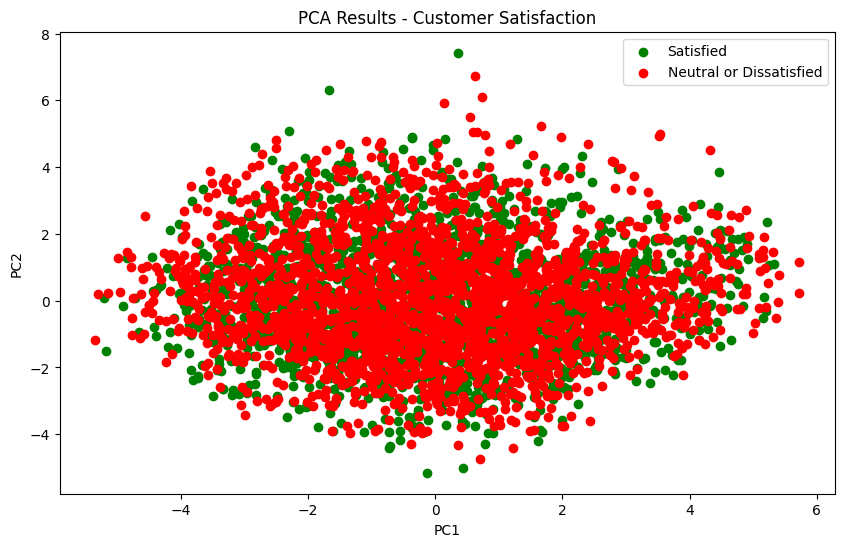

In [75]:
# Graficar los puntos en el plano PC1-PC2
plt.figure(figsize=(10, 6))
plt.scatter(satisfied['PC1'], satisfied['PC2'], color='green', label='Satisfied')
plt.scatter(not_satisfied['PC1'], not_satisfied['PC2'], color='red', label='Neutral or Dissatisfied')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Results - Customer Satisfaction')
plt.legend()
plt.show()

los puntos verdes representan a los clientes satisfechos y los puntos rojos representan a los clientes neutrales o insatisfechos. 
Los ejes del gráfico corresponden a las dos dimensiones principales (PC1 y PC2) obtenidas mediante PCA.

En pocas palabras, el gráfico sugiere que hay cierta separación entre los clientes satisfechos y los clientes neutrales o insatisfechos, aunque también existe superposición entre los grupos. 
Las dimensiones principales del PCA no se corresponden directamente con las características originales, pero influyen en la separación de los grupos en el gráfico. 
Es importante realizar un análisis más detallado para obtener conclusiones más precisas.

<h4>Modelo II<h4>

In [95]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargar los datos de entrenamiento y prueba
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Convertir la variable objetivo a representación numérica
train_df["satisfaction"] = train_df["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1})
test_df["satisfaction"] = test_df["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1})

# Separar las características de la variable objetivo
X_train = train_df[["id", "Age"]]
y_train = train_df["satisfaction"]
X_test = test_df[["id", "Age"]]
y_test = test_df["satisfaction"]

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
predictions = model.predict(X_test)

# Calcular el coeficiente de determinación R cuadrado
r2 = r2_score(y_test, predictions)

# Imprimir el valor de R cuadrado
print(r2)

0.014584903154241213


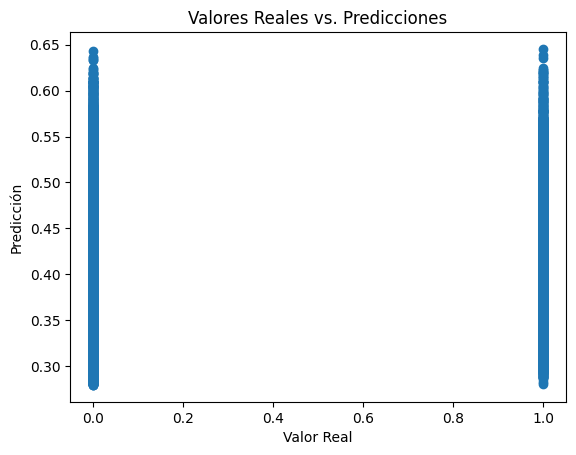

In [97]:
# Graficar las predicciones versus los valores reales
plt.scatter(y_test, predictions)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Valores Reales vs. Predicciones')
plt.show()

In [96]:
# Cargar el conjunto de datos
train_df = pd.read_csv("train.csv")

# Calcular la tabla de frecuencia
frequency_table = train_df[["id", "Age", "satisfaction"]].value_counts().reset_index()
frequency_table.columns = ["id", "Age", "satisfaction", "Frequency"]

# Mostrar la tabla de frecuencia
print(frequency_table)

            id  Age             satisfaction  Frequency
0            1   48  neutral or dissatisfied          1
1        86507   29  neutral or dissatisfied          1
2        86519   54  neutral or dissatisfied          1
3        86518   62  neutral or dissatisfied          1
4        86517    8  neutral or dissatisfied          1
...        ...  ...                      ...        ...
103899   43254   30                satisfied          1
103900   43253   42                satisfied          1
103901   43252   38                satisfied          1
103902   43250   35                satisfied          1
103903  129880   20  neutral or dissatisfied          1

[103904 rows x 4 columns]


<h6>Esto generará una tabla de frecuencia que muestra la frecuencia de cada combinación única de "id", "Age" y "satisfaction" en el conjunto de datos.<h5>

<h4>Hacemos un par mas de visualizaciones de graficos de barra para enteder mejor la inclinacion de los pasajeros a la hora de saber como se sienten en su vuelo<h4>

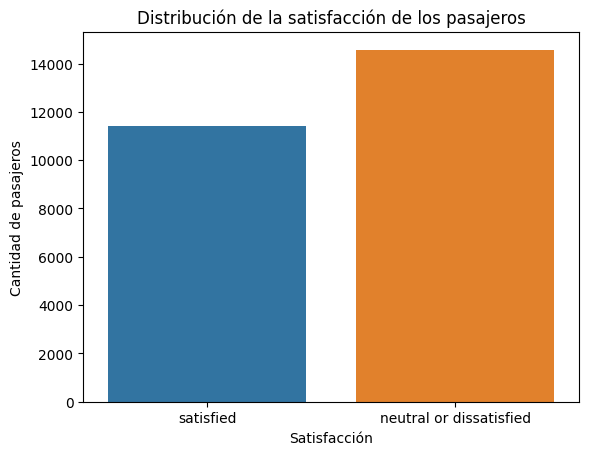

In [22]:
# Visualización de la distribución de la satisfacción de los pasajeros
sns.countplot(x='satisfaction', data=test_df)
plt.title('Distribución de la satisfacción de los pasajeros')
plt.xlabel('Satisfacción')
plt.ylabel('Cantidad de pasajeros')
plt.show()

<h5>Segun la cantidad de pasajeros reflejados en esta grafica existen mas pasajeros insatisfechos que satisfechos.<h5>

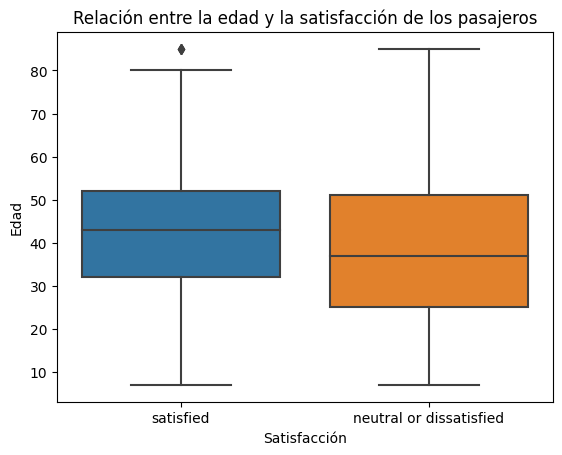

In [23]:
# Visualización de la relación entre la edad y la satisfacción de los pasajeros
sns.boxplot(x='satisfaction', y='Age', data=test_df)
plt.title('Relación entre la edad y la satisfacción de los pasajeros')
plt.xlabel('Satisfacción')
plt.ylabel('Edad')
plt.show()

<h5>segun nos muestra este grafico, las personas menos satisfechas ronda una edad mayor alos 30 años y menor alos 60 años, mientras que las personas satisfechas rondan una edad promedio mayor de 20 años y menor de 50 años.<h5>

<AxesSubplot: xlabel='Gender_Code', ylabel='satisfaction'>

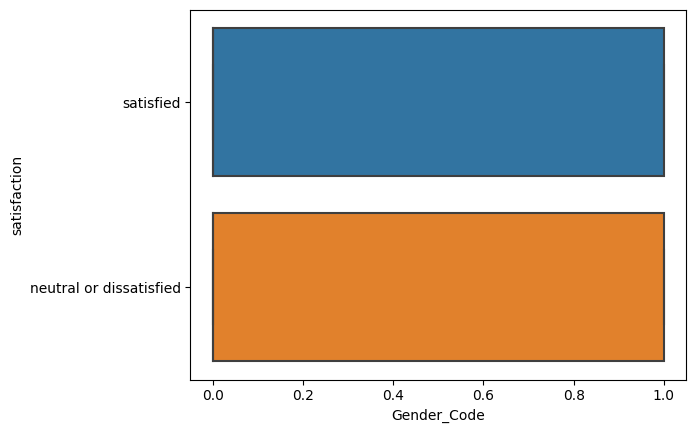

In [24]:
# Visualización de la relación entre Genero y la satisfacción de los pasajeros
test_df['Gender_Code'] = test_df['Gender'].map({'Female': 0, 'Male': 1})
sns.boxplot(x='Gender_Code', y='satisfaction', data=test_df)

<h5>podemos concluir que no tiene ninguana insidencia significativa.<h5>

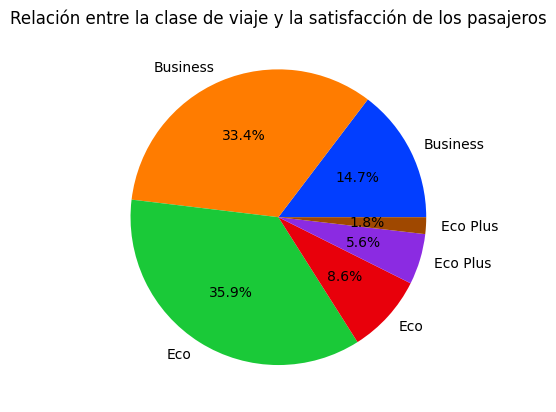

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la cantidad de pasajeros en cada clase y satisfacción
class_sat_counts = test_df.groupby(['Class', 'satisfaction']).size().reset_index(name='counts')

# Crear una figura y un eje de subtramas
fig, ax = plt.subplots()

# Generar una lista de colores para los segmentos de la torta
colors = sns.color_palette('bright', len(class_sat_counts))

# Dibujar la torta
ax.pie(class_sat_counts['counts'], labels=class_sat_counts['Class'], colors=colors, autopct='%1.1f%%')

# Establecer el título de la figura
ax.set_title('Relación entre la clase de viaje y la satisfacción de los pasajeros')

# Mostrar la figura
plt.show()

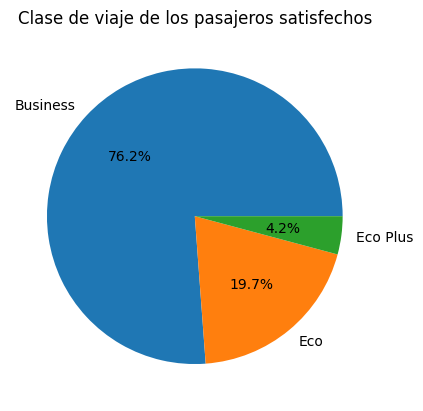

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el dataframe por los pasajeros satisfechos
satisfied_df = test_df[test_df['satisfaction'] == 'satisfied']

# Contar la cantidad de pasajeros satisfechos en cada clase de viaje
class_counts = satisfied_df['Class'].value_counts()

# Crear un gráfico de torta
class_counts.plot.pie(autopct='%1.1f%%')
plt.title('Clase de viaje de los pasajeros satisfechos')
plt.ylabel('')
plt.show()

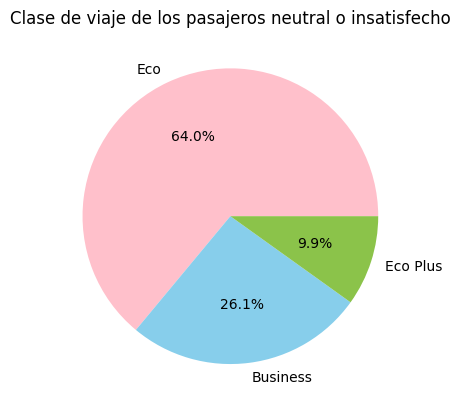

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el dataframe por los pasajeros satisfechos
satisfied_df = test_df[test_df['satisfaction'] == 'neutral or dissatisfied']

# Contar la cantidad de pasajeros satisfechos en cada clase de viaje
class_counts = satisfied_df['Class'].value_counts()

# Crear un gráfico de torta
class_counts.plot.pie(autopct='%1.1f%%',colors=['pink', '#87CEEB', '#8BC34A'])
plt.title('Clase de viaje de los pasajeros neutral o insatisfecho')
plt.ylabel('')
plt.show()

<h5>Basandonos en los datos anteriormente puesto respondemos a las preguntas antes propuestas <h5>

1. ¿Cómo afecta la edad de los pasajeros a su satisfacción en un vuelo?

Según los resultados del análisis, parece que la edad de los pasajeros no tiene una influencia significativa en su nivel de satisfacción durante un vuelo. Esto se debe a que el valor P es de 0,51, lo que indica que no hay una relación clara y estadísticamente significativa entre la edad y la satisfacción. En resumen, la edad no parece ser un factor determinante en la satisfacción de los pasajeros durante un vuelo.

2. ¿Existe una diferencia en la satisfacción entre los pasajeros hombres y mujeres?

Según los resultados obtenidos en el análisis, no encontramos diferencias significativas en la satisfacción de los pasajeros en función de su género. Esto significa que no hay suficiente evidencia para demostrar que la satisfacción es diferente entre hombres y mujeres. En otras palabras, ambos géneros tienden a sentirse igualmente satisfechos con su experiencia de vuelo.

3. ¿Hay una relación entre el tipo de viaje (por ejemplo, vacaciones, negocios) y la satisfacción del pasajero?
Según los resultados obtenidos, parece que la clase de viaje en la que uno viaja sí tiene un efecto en su nivel de satisfacción. Específicamente, los pasajeros que viajan en clase económica parecen estar menos satisfechos que aquellos que viajan en clase Eco Plus.

<h3>Concluision<h3>
<h5>Basándonos en los resultados del análisis, podemos concluir que el género del pasajero no parece tener una influencia significativa en su satisfacción durante el vuelo. Por otro lado, la clase de viaje sí afecta a la satisfacción, siendo la satisfacción de los pasajeros de clase económica significativamente menor que la de los pasajeros de clase Eco Plus. Además, la distancia del vuelo y el retraso de llegada también influyen en la satisfacción de los pasajeros. Sin embargo, la edad del pasajero no parece tener un impacto significativo en su satisfacción. Es importante tener en cuenta que estos resultados pueden deberse al azar y no necesariamente indican una relación causal entre las variables.<h5>


<h3>Recomendaciones<h3>

<h5>Basándonos en los resultados del análisis, podríamos sugerir algunas soluciones para mejorar la satisfacción de los pasajeros. Si bien el género del pasajero no parece tener una influencia significativa en su satisfacción durante el vuelo, es importante prestar atención a la clase de viaje, ya que se encontró que la satisfacción de los pasajeros de clase económica es significativamente menor que la de los pasajeros de clase Eco Plus. Una posible solución sería ofrecer servicios y comodidades adicionales a los pasajeros de clase económica para mejorar su experiencia de vuelo.<h5>

<h5>Además, se encontró que la distancia del vuelo y el retraso de llegada también influyen en la satisfacción de los pasajeros, lo que sugiere la necesidad de mejorar la puntualidad y la calidad del servicio en general. Sin embargo, dado que estos resultados pueden deberse al azar, es importante seguir investigando para determinar si hay una relación causal entre estas variables y la satisfacción del pasajero.<h5>

<h5>En resumen, se podría considerar ofrecer servicios y comodidades adicionales para los pasajeros de clase económica y mejorar la puntualidad y la calidad del servicio en general para mejorar la satisfacción de los pasajeros en los vuelos.<h5>
    
